# Statistical Testing

In [70]:
import seaborn as sns
import os
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn
import pingouin as pg
from pingouin import kruskal
from statsmodels.multivariate.manova import MANOVA

from collections import Counter 
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Allow full width of display
import plotly.graph_objs as go
from matplotlib.dates import DateFormatter



In [27]:
sys.path

['/Users/emilyli/opt/anaconda3/lib/python39.zip',
 '/Users/emilyli/opt/anaconda3/lib/python3.9',
 '/Users/emilyli/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/emilyli/eli_py39/lib/python3.9/site-packages']

In [246]:
os.chdir('/Users/emilyli/workspace/datasets/')

In [247]:
# import the data
df= pd.read_csv("Iris.csv")
df.columns = df.columns.str.lower()
df['sepal_width'] = df['sepalwidthcm']
# df[''] = df['petallengthcm']
# df[''] = df['petalwidthcm']
# df[''] = df['sepallengthcm']



setosa = df[(df['species'] == 'Iris-setosa')]
versicolor = df[(df['species'] == 'Iris-versicolor')]
virginica = df[(df['species'] == 'Iris-virginica')]



In [291]:
df2= pd.read_csv("data_science_salaries.csv")

value_counts = df2['job_title'].value_counts()
filtered_counts = value_counts[value_counts >= 30]
filtered_counts
major_job_titles = filtered_counts.index.tolist()
# major_job_titles = [x.lower() for x in major_job_titles]
major_job_titles_df = df2[df2['job_title'].isin(major_job_titles)]

major_job_titles2 = [x for x in major_job_titles if 'scientist' in x.lower() or 'ml' in x.lower() or 'machine learning' in x.lower() ]
major_job_titles_df2 = df2[df2['job_title'].isin(major_job_titles2)]

In [315]:
df3= pd.read_csv("factors_affect_children_anemia.csv")
df3.shape
df3.columns = df3.columns.str.lower()
df3.rename(columns=lambda x: x.replace(' ', '_').replace('.', '_'), inplace=True)



In [316]:
df3.head()

,age_in_5-year_groups,type_of_place_of_residence,highest_educational_level,wealth_index_combined,births_in_last_five_years,age_of_respondent_at_1st_birth,hemoglobin_level_adjusted_for_altitude_and_smoking_(g/dl_-_1_decimal),anemia_level,have_mosquito_bed_net_for_sleeping_(from_household_questionnaire),smokes_cigarettes,current_marital_status,currently_residing_with_husband/partner,when_child_put_to_breast,had_fever_in_last_two_weeks,hemoglobin_level_adjusted_for_altitude_(g/dl_-_1_decimal),anemia_level_1,"taking_iron_pills,_sprinkles_or_syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [320]:
df3['anemia_level_1'].value_counts(dropna=False)

anemia_level_1
NaN           23742
Moderate       3927
Not anemic     3179
Mild           2754
Severe          322
Name: count, dtype: int64

In [318]:
df3.columns

Index(['age_in_5-year_groups', 'type_of_place_of_residence',
       'highest_educational_level', 'wealth_index_combined',
       'births_in_last_five_years', 'age_of_respondent_at_1st_birth',
       'hemoglobin_level_adjusted_for_altitude_and_smoking_(g/dl_-_1_decimal)',
       'anemia_level',
       'have_mosquito_bed_net_for_sleeping_(from_household_questionnaire)',
       'smokes_cigarettes', 'current_marital_status',
       'currently_residing_with_husband/partner', 'when_child_put_to_breast',
       'had_fever_in_last_two_weeks',
       'hemoglobin_level_adjusted_for_altitude_(g/dl_-_1_decimal)',
       'anemia_level_1', 'taking_iron_pills,_sprinkles_or_syrup'],
      dtype='object')

In [334]:
# Create a contingency table
contingency_table = pd.crosstab(df3['wealth_index_combined'], df3['anemia_level_1'])
# Apply chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print( chi2_stat, p_value, dof, expected)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Statistic': [chi2_stat],
    'p-value': [p_value],
    'Degrees of Freedom': [dof]
})

# # Add the expected frequencies as rows to the DataFrame
# for i, row in enumerate(expected):
#     for j, val in enumerate(row):
#         results_df[f'Expected_{i+1}_{j+1}'] = val

# Print the results DataFrame
results_df



,Statistic,p-value,Degrees of Freedom
0,530.399116,7.450966e-106,12


In [335]:
contingency_table


anemia_level_1,Mild,Moderate,Not anemic,Severe
wealth_index_combined,,,,
Middle,596,865,729,59
Poorer,525,926,498,87
Poorest,522,983,418,119
Richer,606,750,737,48
Richest,505,403,797,9


# Test Hypothesis Testing Assumptions

In [ ]:
# homogeneity of variance
# Homogeneity of variance test:
# Null hypothesis (H0): The variances of the groups are equal (homogeneity of variance).
# Alternative hypothesis (H1): The variances of the groups are not equal (heterogeneity of variance).

stats.levene(setosa['sepal_width'], versicolor['sepal_width'])


In [ ]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
pg.homoscedasticity(df2, method="bartlett", alpha=.05)


In [11]:
major_job_titles_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [12]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()



,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,sepal_width
id,1.000000,0.716676,-0.397729,0.882747,0.899759,-0.397729
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954,-0.109369
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757,-0.420516
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000,-0.356544
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000


In [44]:
# sns.pairplot(data=df, height = 1.5)



In [13]:
# homogeneity of variance
stats.levene(virginica['sepal_width'], versicolor['sepal_width'])


LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841042)

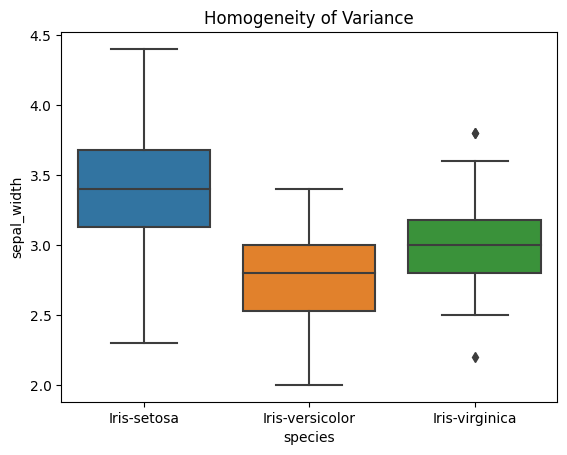

In [14]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Homogeneity of Variance')
plt.show()


In [15]:
# Shapiro-Wilk test for normality

# Normality test:
# Null hypothesis (H0): The data follows a normal distribution.
# Alternative hypothesis (H1): The data does not follow a normal distribution.
# Shapiro-Wilk test, Kolmogorov-Smirnov test, or Anderson-Darling test are often used to assess whether the data significantly deviates 
# from a normal distribution. If the p-value from these tests is less than a chosen significance level (often denoted as α), the null hypothesis 
# of normality is rejected, indicating that there is evidence to suggest that the data does not follow a normal distribution.
stats.shapiro(setosa['sepal_width'])


ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

In [16]:
stats.shapiro(versicolor['sepal_width'])

ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)

# T-Tests

In [17]:
# independent t-test - parametric
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])



Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [285]:
# paired t-test - parametric
stats.ttest_rel(setosa['sepal_width'], versicolor['sepal_width'])



TtestResult(statistic=8.846695040854682, pvalue=9.989211333619151e-12, df=49)

In [286]:

# independent t-test - nonparametric
stats.wilcoxon(setosa['sepal_width'], versicolor['sepal_width'])


/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=34.0, pvalue=3.0906620533922174e-08)

# Chi-Squared Test

In [287]:
# chisq test: test the association between categorical variables.
stats.chi2_contengency()

SyntaxError: invalid syntax (3139269013.py, line 1)

In [297]:
major_job_titles_df2[['job_title', 'experience_level']].value_counts()

job_title                                 experience_level
Data Scientist                            Senior-level        794
Machine Learning Engineer                 Senior-level        472
Data Scientist                            Mid-level           329
Machine Learning Engineer                 Mid-level           122
Research Scientist                        Senior-level        121
Data Scientist                            Entry-level          97
ML Engineer                               Senior-level         84
Applied Scientist                         Senior-level         76
Research Scientist                        Mid-level            63
Machine Learning Scientist                Senior-level         52
Machine Learning Engineer                 Entry-level          29
Machine Learning Infrastructure Engineer  Senior-level         27
ML Engineer                               Mid-level            24
Data Scientist                            Executive-level      23
Research Scientis

In [301]:
# Example DataFrame
data = pd.DataFrame({
    'Category1': ['A', 'A', 'B', 'B', 'A', 'B'],
    'Category2': ['X', 'Y', 'Y', 'X', 'X', 'Y'],
    'Numeric1': [1, 2, 3, 4, 5, 6],
    'Numeric2': [7, 8, 9, 10, 11, 12]
})

# Binning or categorizing Numeric1 and Numeric2
# For simplicity, let's categorize them into two bins each
data['Numeric1_bin'] = pd.cut(data['Numeric1'], bins=2, labels=['Low', 'High'])
data['Numeric2_bin'] = pd.cut(data['Numeric2'], bins=2, labels=['Low', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['Category1'], data['Category2'])

# Apply chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(chi2_stat, p_value, dof, expected )

0.0 1.0 1 [[1.5 1.5]
 [1.5 1.5]]


In [299]:
data

,Category1,Category2,Numeric1,Numeric2,Numeric1_bin,Numeric2_bin
0,A,X,1,7,Low,Low
1,A,Y,2,8,Low,Low
2,B,Y,3,9,Low,Low
3,B,X,4,10,High,High
4,A,X,5,11,High,High
5,B,Y,6,12,High,High


In [300]:
contingency_table

Category2,X,Y
Category1,,
A,2,1
B,1,2


In [37]:
# anova test
# Run the ANOVA
# homogeneity normality and independent assumptions
aov = pg.anova(data=df2, dv='salary_in_usd', between='experience_level', detailed=True)
print(aov)
result = df2.groupby('experience_level')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)

median_salary = df2.groupby('experience_level')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

             Source            SS    DF            MS           F   
0  experience_level  4.903548e+12     3  1.634516e+12  380.809147  \
1            Within  2.830718e+13  6595  4.292218e+09         NaN   

           p-unc      np2  
0  4.075129e-228  0.14765  
1            NaN      NaN  


,count,mean,std,min,25%,50%,75%,max,median
experience_level,,,,,,,,,
Executive-level,254.0,189687.346457,71571.166828,15000.0,136000.0,184560.0,230000.0,465000.0,184560.0
Senior-level,4105.0,162071.063581,64444.875091,15809.0,118000.0,153600.0,199200.0,750000.0,153600.0
Mid-level,1675.0,119019.812537,71783.359309,15000.0,73523.0,106500.0,150000.0,750000.0,106500.0
Entry-level,565.0,84448.916814,48758.315152,15000.0,49646.0,75000.0,110000.0,350000.0,75000.0


In [86]:
# homogeneity normality and independent assumptions
# pairwise ttest
results = pg.pairwise_tests(data=df2, dv='salary_in_usd', between='experience_level')
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H1','H0') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,stat_significant,test_favor,mean_higher
0,experience_level,Entry-level,Executive-level,False,True,-21.315910,362.508690,two-sided,6.236980e-66,4.892000e+76,-1.850745,1,H0,group_B
1,experience_level,Entry-level,Mid-level,False,True,-12.809247,1432.233962,two-sided,1.212519e-35,7.753000e+32,-0.517868,1,H0,group_B
2,experience_level,Entry-level,Senior-level,False,True,-33.976022,860.987453,two-sided,3.546610e-161,9.834000e+221,-1.236646,1,H0,group_B
3,experience_level,Executive-level,Mid-level,False,True,14.657850,334.895739,two-sided,6.270718e-38,4.661000e+42,0.984454,1,H0,group_A
4,experience_level,Executive-level,Senior-level,False,True,6.000877,278.978135,two-sided,6.080278e-09,3.450000e+06,0.425578,1,H0,group_A
5,experience_level,Mid-level,Senior-level,False,True,-21.292533,2831.225024,two-sided,1.936704e-93,1.154000e+93,-0.645806,1,H0,group_B


# Tukey Pairwse T-Test

In [89]:
# Tukey's Honestly Significant Difference (HSD) test,
# 'A': The first group in the comparison.
# 'B': The second group in the comparison.
# 'mean(A)': The mean of the variable for group A.
# 'mean(B)': The mean of the variable for group B.
# 'diff': The difference between the means of group A and group B.
# 'se': The standard error of the difference.
# 'tail': The tail of the test (either 'two-sided', 'greater', or 'less').
# 'T': The value of the test statistic.
# 'p-tukey': The p-value obtained from the Tukey HSD test.
# 'hedges': The Hedges' effect size (mean difference divided by the pooled standard deviation).

results = pg.pairwise_tukey(dv='salary_in_usd', between='experience_level', data=df2,).round(3)
stat_significant_threshold = 0.05
# # create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-tukey']<= stat_significant_threshold,1,0) 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 
results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)




# pg.pairwise_gameshowell(data=df, dv='body_mass_g',
#                         between='species').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,stat_significant,mean_higher
0,Entry-level,Executive-level,84448.917,189687.346,-105238.430,4949.277,-21.263,0.0,-1.851,1,group_B
1,Entry-level,Mid-level,84448.917,119019.813,-34570.896,3187.376,-10.846,0.0,-0.518,1,group_B
2,Entry-level,Senior-level,84448.917,162071.064,-77622.147,2939.805,-26.404,0.0,-1.237,1,group_B
3,Executive-level,Mid-level,189687.346,119019.813,70667.534,4411.464,16.019,0.0,0.984,1,group_A
4,Executive-level,Senior-level,189687.346,162071.064,27616.283,4236.048,6.519,0.0,0.426,1,group_A
5,Mid-level,Senior-level,119019.813,162071.064,-43051.251,1899.507,-22.664,0.0,-0.646,1,group_B


In [ ]:
results = stats.wilcoxon(df2['salary_in_usd'], versicolor[i], alternative='two-sided', correction=True)
print(results)

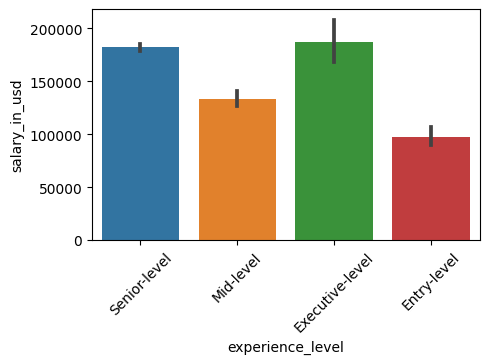

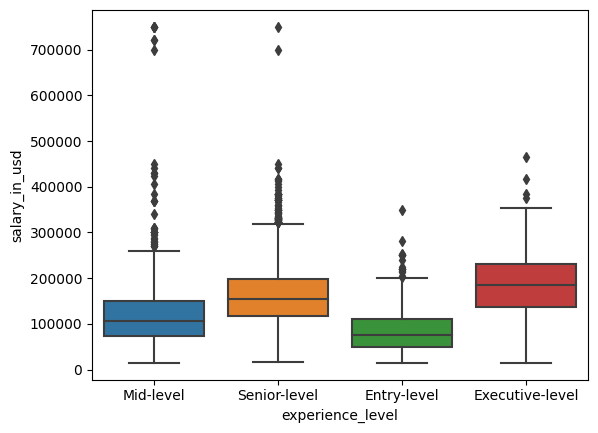

In [59]:
plt.figure( figsize = (5,3))

sns.barplot(x = major_job_titles_df2['experience_level'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()
sns.boxplot(x='experience_level', y='salary_in_usd', data=df2)
plt.show()

In [39]:
# Source: top = variation between, bottom = variation within
# SS: sum of squared deviations of group means from the overall mean.  top= SSB, bottom = SSW
# MS: SS/DF = MS, top=MSB, bottom= MSW
# F:F-Test, F statistics, MSB/MSW: null hypothesis (H0) that the means of the groups are equal. A higher F-value suggests that the difference between group means is more significant.
# p-unc; Uncorrected p-value, default at 0.05, H0: no group meean diff, Ha: otherwise
# np2: effect size, partial eta-squared, partial η²,  It represents the proportion of variance explained by the effect (in this case, the grouping variable) while taking into account the influence of 
    # other factors or covariates in the model.  typically range between 0 and 1, 
    # Small effect: η² around 0.01
    # Medium effect: η² around 0.06
    # Large effect: η² around 0.14
# 'eps': Greenhouse-Geisser epsilon factor (= index of sphericity)
# 'p-GG-corr': Greenhouse-Geisser corrected p-value
# 'W-spher': Sphericity test statistic
# 'p-spher': p-value of the sphericity test
# 'sphericity': sphericity of the data (boolean)
aov = pg.anova(data=major_job_titles_df, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df['job_title'])

      Source            SS    DF            MS          F          p-unc   
0  job_title  3.977610e+12    23  1.729396e+11  40.582783  2.241978e-168  \
1     Within  2.471187e+13  5799  4.261403e+09        NaN            NaN   

        np2  
0  0.138643  
1       NaN  


Counter({'Data Engineer': 1307,
         'Data Scientist': 1243,
         'Data Analyst': 910,
         'Machine Learning Engineer': 629,
         'Analytics Engineer': 246,
         'Research Scientist': 206,
         'Data Architect': 176,
         'Research Engineer': 136,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Data Science Manager': 86,
         'Business Intelligence Analyst': 82,
         'Machine Learning Scientist': 73,
         'Business Intelligence Engineer': 69,
         'Data Manager': 63,
         'Research Analyst': 60,
         'Data Science': 56,
         'AI Engineer': 48,
         'Data Specialist': 47,
         'Data Science Consultant': 42,
         'BI Developer': 41,
         'Director of Data Science': 31,
         'Data Analytics Manager': 31,
         'Machine Learning Infrastructure Engineer': 31})

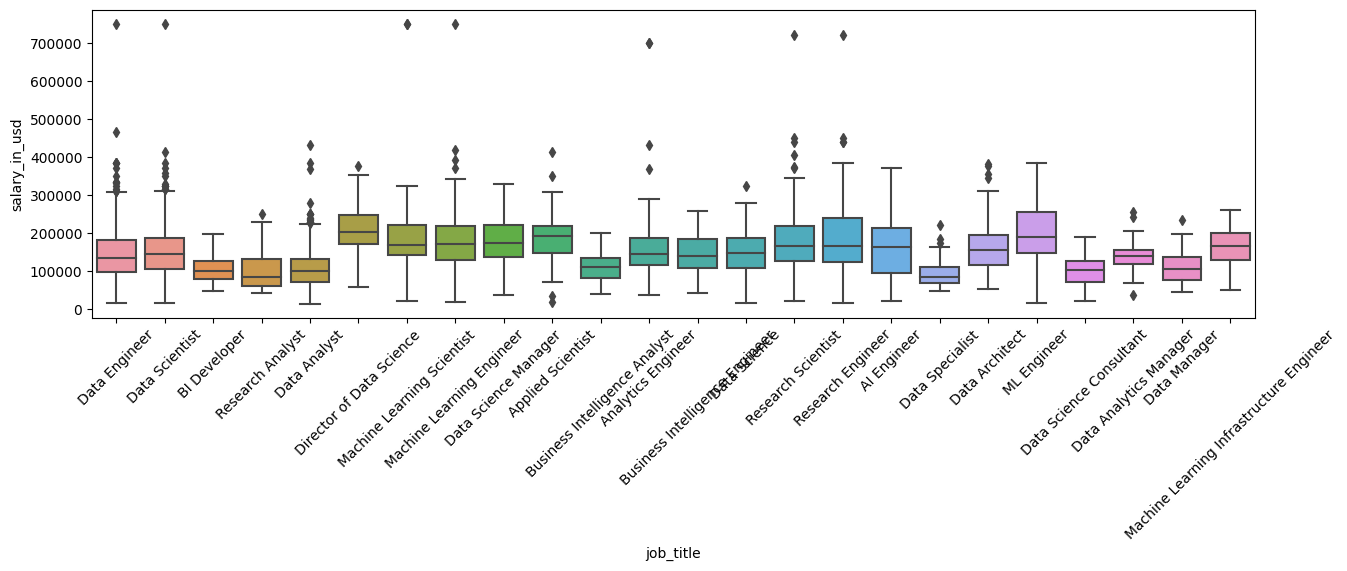

In [26]:
plt.figure(figsize=(15, 4)) 

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df)
plt.xticks(rotation=45)

plt.show()

In [24]:
# homogeneity normality and independent assumptions
aov = pg.anova(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df2['job_title'])

      Source            SS    DF            MS         F         p-unc   
0  job_title  7.064558e+11     6  1.177426e+11  23.26564  7.803177e-27  \
1     Within  1.206999e+13  2385  5.060794e+09       NaN           NaN   

        np2  
0  0.055294  
1       NaN  


Counter({'Data Scientist': 1243,
         'Machine Learning Engineer': 629,
         'Research Scientist': 206,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Machine Learning Scientist': 73,
         'Machine Learning Infrastructure Engineer': 31})

In [42]:
# summary statistics of 1numerical + 1categorical
result = major_job_titles_df2.groupby('job_title')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)
median_salary = df2.groupby('job_title')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

,count,mean,std,min,25%,50%,75%,max,median
job_title,,,,,,,,,
ML Engineer,113.0,198223.256637,79227.346718,15966.0,148000.0,189400.0,256000.0,385000.0,189400.0
Machine Learning Scientist,73.0,193710.438356,110030.732781,22800.0,142200.0,170000.0,222000.0,750000.0,170000.0
Applied Scientist,97.0,190687.711340,57793.195716,20000.0,149300.0,191475.0,220000.0,414000.0,191475.0
Research Scientist,206.0,180082.029126,82649.704531,23000.0,127975.0,165250.0,220000.0,720000.0,165250.0
Machine Learning Engineer,629.0,177226.448331,72770.418335,20000.0,129300.0,170730.0,220000.0,750000.0,170730.0
Machine Learning Infrastructure Engineer,31.0,162711.096774,54866.030007,50180.0,129850.0,165400.0,200460.0,260000.0,165400.0
Data Scientist,1243.0,149036.650845,65683.503427,16000.0,105000.0,144500.0,187457.5,750000.0,144500.0


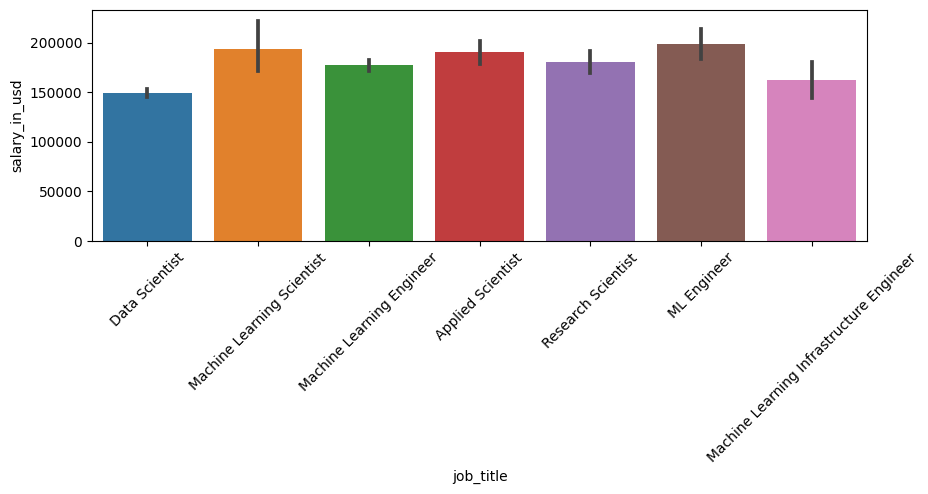

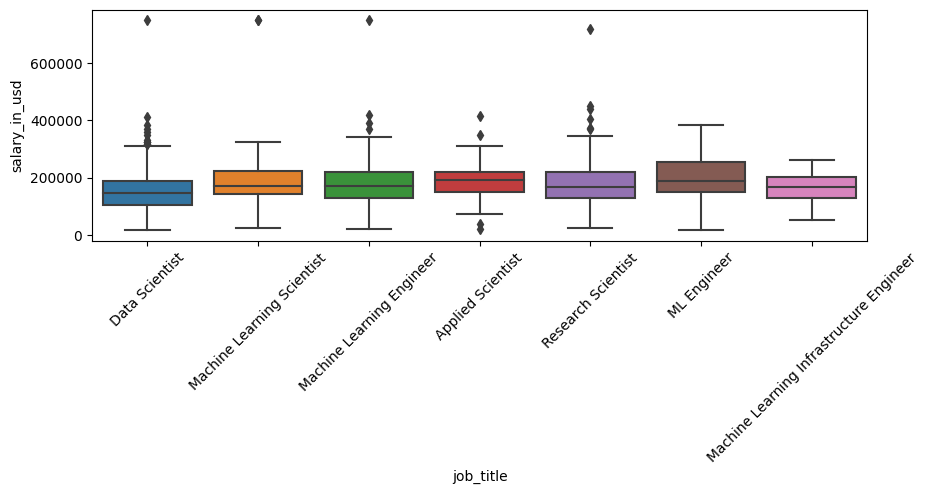

In [56]:
plt.figure( figsize = (10,3))

sns.barplot(x = major_job_titles_df2['job_title'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()

plt.figure( figsize = (10,3))

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df2)
plt.xticks(rotation=45)
# plt.yscale('log')

plt.show()


# General Pairwise T-Test

In [111]:
# homogeneity normality and independent assumptions

# pairwise ttest - This function is more general and can perform various pairwise comparisons, including t-tests,
# Wilcoxon signed-rank tests, and Mann-Whitney U tests, depending on the input data and parameters.
# pairwise t-test to check which ones are stat significance after a significant anova
# pair : same subjects are measured under different conditions (true), False otherwise
# Parametric:Parametric tests assume that the data come from a normally distributed population with equal variances.
# 'p-unc' column: Contains the uncorrected p-value for the T-test. other choices:  (none, bonf , sidak, holm, fdr_bh, fdr_by): Bonferroni, Sidak, step-down method using Bonferroni, Benjamini/Hochberg FDR, Benjamini/Yekutieli FDR
# Hedges';  effect size estimate for the comparison. g, a measure of the standardized mean difference between the groups. Positive values indicate that the first group has higher means,
# Hedges: while negative values indicate that the second group has higher means
# BF10; Bayes Factor quantifies the evidence for the alternative hypothesis relative to the null hypothesis. Values greater than 1 indicate evidence for
# BF10; the alternative hypothesis, while values less than 1 indicate evidence for the null hypothesis..
# alternative: the test considers the possibility of differences in both directions. (two-sided, greater, less)

results = pg.pairwise_tests(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', 
                            parametric = True,
                            # alternative = 'two-sided',
                            # padjust = 'fdr_bh'
                           )
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H0','H1') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,stat_significant,test_favor,mean_higher
0,job_title,Applied Scientist,Data Scientist,False,True,6.765206,116.237697,two-sided,5.677613e-10,5.961493e-09,fdr_bh,3.588000e+08,0.638960,1,H1,group_A
2,job_title,Applied Scientist,Machine Learning Engineer,False,True,2.056353,147.336302,two-sided,4.151293e-02,9.686351e-02,fdr_bh,9.110000e-01,0.189488,1,H0,group_A
3,job_title,Applied Scientist,Machine Learning Infrastructure Engineer,False,True,2.439311,52.966813,two-sided,1.809833e-02,4.750810e-02,fdr_bh,2.918000e+00,0.486952,1,H1,group_A
6,job_title,Data Scientist,ML Engineer,False,True,-6.402502,126.389224,two-sided,2.730955e-09,1.911669e-08,fdr_bh,3.721000e+07,-0.734732,1,H1,group_B
7,job_title,Data Scientist,Machine Learning Engineer,False,True,-8.175295,1153.424238,two-sided,7.710703e-16,1.619248e-14,fdr_bh,7.741000e+12,-0.413503,1,H1,group_B
9,job_title,Data Scientist,Machine Learning Scientist,False,True,-3.433227,75.043322,two-sided,9.740145e-04,4.090861e-03,fdr_bh,3.590300e+01,-0.648419,1,H1,group_B
10,job_title,Data Scientist,Research Scientist,False,True,-5.129474,249.709500,two-sided,5.835169e-07,3.063464e-06,fdr_bh,3.029000e+04,-0.454018,1,H1,group_B
11,job_title,ML Engineer,Machine Learning Engineer,False,True,2.625270,147.916406,two-sided,9.567766e-03,2.870330e-02,fdr_bh,3.098000e+00,0.284283,1,H1,group_A
12,job_title,ML Engineer,Machine Learning Infrastructure Engineer,False,True,2.874237,68.164609,two-sided,5.397250e-03,1.889038e-02,fdr_bh,7.929000e+00,0.472597,1,H1,group_A


In [51]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# none-independent anova /One-way repeated-measures 
# between vs. within arg
# within arg: factor that compute group mean from
# subject: the col contains info which subject were done the repeat measureed from , eg: patientId, etc.
rm_aov = pg.rm_anova(data=major_job_titles_df2, dv='salary_in_usd', within='Disgustingness',  subject='Subject', detailed=True)
rm_aov



TypeError: rm_anova() got an unexpected keyword argument 'between'

In [97]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# none-independent anova / two-way repeated-measures = two factors
aov = pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df)


0     3.588000e+08
1     2.030000e-01
2     9.110000e-01
3     2.918000e+00
4     1.710000e-01
5     2.970000e-01
6     3.721000e+07
7     7.741000e+12
8     4.480000e-01
9     3.590300e+01
10    3.029000e+04
11    3.098000e+00
12    7.929000e+00
13    1.700000e-01
14    7.510000e-01
15    4.810000e-01
16    2.840000e-01
17    9.800000e-02
18    1.098000e+00
19    5.730000e-01
20    2.300000e-01
Name: BF10, dtype: float64

In [68]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
# pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
# pg.homoscedasticity(df2, method="bartlett", alpha=.05)



,W,pval,equal_var
levene,2.775019,7.365424e-23,False


# Parametric ANOVA Tests

In [69]:
# homogeneity normality and independent assumptions
# 1-way anova
pg.anova(dv='Pain threshold', between='Hair color', data=df, detailed=True)
# 2-way anova
pg.anova(dv="Yield", between=["Blend", "Crop"],  data=df)
# 2-way annova with unbalanced design (requires statsmodels)
pg.anova(dv="Scores", between=["Diet", "Exercise"], effsize="n2")
# 3-way anova 
pg.anova(dv='Cholesterol', between=['Sex', 'Risk', 'Drug'],ss_type=3)
# One-way and two-way repeated measures ANOVA, rm = repeat-measured
pg.rm_anova(dv='DesireToKill', within='Disgustingness',
                  subject='Subject', data=df, detailed=True, effsize="np2")

# two-way repeated measures anova, 
pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df, detailed=True,)

 # the between-subject groups are unbalanced (= unequal sample sizes), a type II ANOVA will be computed.
# when you have both within-subjects and between-subjects factors:# or When you want to assess interaction effects
# When you want to control for subject-specific variability
pg.mixed_anova(dv='Scores', between='Group', within='Time', subject='Subject', data=df)

# none-homogeneity (unequal variance), normality and independent assumptions
pg.welch_anova(dv='Pain threshold', between='Hair color', data=df)


KeyError: 'Pain threshold'

In [ ]:
# The pairwise Tukey and pairwise Games-Howell tests are both post-hoc tests used in ANOVA (Analysis of Variance) to determine which specific groups differ significantly 
# from each other after finding a significant omnibus result in the ANOVA
pg.pairwise_tukey(dv='body_mass_g', between='species').round(3)

pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

# None-Parameric (Multi-Groups) Test

In [66]:
# Kruskal-Wallis H-test: non-parametric test for independent groups statistically differences: (equivalent to parametric using ANOVA)
# (H0): The distributions of all groups are equal.s (H1): At least one of the groups has a different distribution.
kruskal(data=major_job_titles_df2, dv='salary_in_usd', between='job_title')


,Source,ddof1,H,p-unc
Kruskal,job_title,6,138.238659,2.358253e-27


In [72]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,sepal_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.5
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6


# None-Parametric Pairwise (Paired) T-Test
## test Single target numericals for two groups /pairwise levels

In [122]:
#Wilcoxon test: None-parametric pairwise Paired T-Test
# Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
# compare two group levels at a time for every numerical feature of Iris
#the scipy method:
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = stats.wilcoxon(setosa[i], versicolor[i], alternative='two-sided', correction=True)
    print(results)
    
#the pg method:
# 'W-val': W-value
# 'alternative': tail of the test
# 'p-val': p-value
# 'RBC' : matched pairs rank-biserial correlation (effect size)
# 'CLES' : common language effect size
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = pg.wilcoxon(setosa[i], versicolor[i], alternative='two-sided', correction=True)
    print(results)

sepallengthcm
WilcoxonResult(statistic=19.0, pvalue=3.5865480097410166e-09)
sepalwidthcm
WilcoxonResult(statistic=34.0, pvalue=3.1885253041485035e-08)
petallengthcm
WilcoxonResult(statistic=0.0, pvalue=1.7763568394002505e-15)
petalwidthcm
WilcoxonResult(statistic=0.0, pvalue=1.7763568394002505e-15)


In [284]:
# (Wilcoxon signed-rank test); pg.pairwise_tests() w/ Parametric = False is the Wilcoxon test 
results = pg.pairwise_tests(data=df, dv='sepallengthcm', between='species', 
                            parametric = False,
                            # alternative = 'two-sided',
                            padjust = 'bonf'
                           )
results

stat_significant_threshold = 0.05
# # create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

# results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges,stat_significant,mean_higher
0,species,Iris-setosa,Iris-versicolor,False,False,168.5,two-sided,8.345827e-14,2.503748e-13,bonf,-2.088053,1,group_B
1,species,Iris-setosa,Iris-virginica,False,False,38.5,two-sided,6.396699e-17,1.919010e-16,bonf,-3.053629,1,group_B
2,species,Iris-versicolor,Iris-virginica,False,False,526.0,two-sided,5.869006e-07,1.760702e-06,bonf,-1.117195,1,group_B


# None-Parametric Pairwise (unpaired/independent) T-Test
## test Single target numericals for two groups /pairwise levels

In [130]:
#Mann-Whitney U Test: None-parametric pairwise Unpaired (independen) T-Test
# compare two group levels at a time for every numerical feature of Iris

#the scipy method: 
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = stats.mannwhitneyu(setosa[i], versicolor[i], use_continuity=True, alternative='two-sided')
    print(results)

# the pg method:
# 'U-val': U-value
# 'alternative': tail of the test
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = pg.mwu(setosa[i], versicolor[i], alternative='two-sided',
                     # method='exact'
                    )
    print(results)
    


sepallengthcm
MannwhitneyuResult(statistic=168.5, pvalue=8.34582714594069e-14)
sepalwidthcm
MannwhitneyuResult(statistic=2305.5, pvalue=2.983442275346375e-13)
petallengthcm
MannwhitneyuResult(statistic=0.0, pvalue=5.634269830542843e-18)
petalwidthcm
MannwhitneyuResult(statistic=0.0, pvalue=2.5081060795249738e-18)
sepallengthcm
     U-val alternative         p-val     RBC    CLES
MWU  168.5   two-sided  8.345827e-14  0.8652  0.0674
sepalwidthcm
      U-val alternative         p-val     RBC    CLES
MWU  2305.5   two-sided  2.983442e-13 -0.8444  0.9222
petallengthcm
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  5.634270e-18  1.0   0.0
petalwidthcm
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  2.508106e-18  1.0   0.0


# None-Parametric Pairwise Paired Test (Wilcoxon signed-rank tests)
## test multiple target numericals for every two groups /pairwise levels

In [282]:
# pg.pairwise_tests + parametric = False is the Wilcoxin test
# test every target numericals for every two groups /pairwise levels
test_cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
all_results = pd.DataFrame()
all_results_list = []

for i in test_cols:
    # print(i)
    results = pg.pairwise_tests(data=df, dv=i, between='species', 
                            parametric = False,
                            # alternative = 'two-sided',
                            padjust = 'bonf')
    stat_significant_threshold = 0.05
    # # create new col for easy stat understanding
    results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
    results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 
    
    results['dependent_var'] = np.repeat(i,results.shape[0])
    # results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
    # results.sort_values(by = 'stat_significant', ascending = False)

    all_results_list.append(results)
    
all_results = pd.concat(all_results_list, ignore_index=True)
all_results.sort_values(by = ['A','B'], ascending = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges,stat_significant,mean_higher,dependent_var
2,species,Iris-versicolor,Iris-virginica,False,False,526.0,two-sided,5.869006e-07,1.760702e-06,bonf,-1.117195,1,group_B,sepallengthcm
5,species,Iris-versicolor,Iris-virginica,False,False,841.0,two-sided,4.572142e-03,1.371643e-02,bonf,-0.636233,1,group_B,sepalwidthcm
8,species,Iris-versicolor,Iris-virginica,False,False,44.5,two-sided,9.133545e-17,2.740063e-16,bonf,-2.501415,1,group_B,petallengthcm
11,species,Iris-versicolor,Iris-virginica,False,False,49.0,two-sided,9.698045e-17,2.909414e-16,bonf,-2.902630,1,group_B,petalwidthcm
1,species,Iris-setosa,Iris-virginica,False,False,38.5,two-sided,6.396699e-17,1.919010e-16,bonf,-3.053629,1,group_B,sepallengthcm
4,species,Iris-setosa,Iris-virginica,False,False,2073.5,two-sided,1.180877e-08,3.542630e-08,bonf,1.248226,1,group_A,sepalwidthcm
7,species,Iris-setosa,Iris-virginica,False,False,0.0,two-sided,5.648433e-18,1.694530e-17,bonf,-9.916467,1,group_B,petallengthcm
10,species,Iris-setosa,Iris-virginica,False,False,0.0,two-sided,2.669258e-18,8.007775e-18,bonf,-8.482063,1,group_B,petalwidthcm
0,species,Iris-setosa,Iris-versicolor,False,False,168.5,two-sided,8.345827e-14,2.503748e-13,bonf,-2.088053,1,group_B,sepallengthcm
3,species,Iris-setosa,Iris-versicolor,False,False,2305.5,two-sided,2.983442e-13,8.950327e-13,bonf,1.842310,1,group_A,sepalwidthcm


# None-Parametric Pairwise un-paired /Independent Test (Mann-Whitney tests)
## test multiple target numericals for every two groups /pairwise levels

In [281]:
# break a df into multiple dfs based on the group levels of a categorical col
# test every target numericals for every two groups /pairwise levels

grouped = df.groupby('species')
dfs_list = [group for _, group in grouped]
# dfs_list
test_cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
results_list = []

for i in range(len(dfs_list) - 1):  # Loop until the second to last DataFrame
    # print(i)
    df1 = dfs_list[i]
    for j in range(i + 1, len(dfs_list)):
        df2 = dfs_list[j]
        
        for k, val_k in enumerate(test_cols):
            
            # iteration_list =[]
            # print(set(df1['species']), set(df2['species']), val_k)
            statistic, p_value = stats.mannwhitneyu(df1[val_k],df2[val_k], alternative='two-sided')
            # results = stats.mannwhitneyu(df1[val_k],df2[val_k], alternative='two-sided')

            # print(results)
            iteration_list = [set(df1['species']),set(df2['species']), val_k, statistic, p_value ]
            results_list.append(iteration_list)

column_names = ['Group_A', 'Group_B', 'dependent_var', 'U Stats', 'P-Value']
results_df = pd.DataFrame(results_list, columns=column_names)
results_df

,Group_A,Group_B,dependent_var,U Stats,P-Value
0,{Iris-setosa},{Iris-versicolor},sepallengthcm,168.5,8.345827e-14
1,{Iris-setosa},{Iris-versicolor},sepalwidthcm,2305.5,2.983442e-13
2,{Iris-setosa},{Iris-versicolor},petallengthcm,0.0,5.634270e-18
3,{Iris-setosa},{Iris-versicolor},petalwidthcm,0.0,2.508106e-18
4,{Iris-setosa},{Iris-virginica},sepallengthcm,38.5,6.396699e-17
5,{Iris-setosa},{Iris-virginica},sepalwidthcm,2073.5,1.180877e-08
6,{Iris-setosa},{Iris-virginica},petallengthcm,0.0,5.648433e-18
7,{Iris-setosa},{Iris-virginica},petalwidthcm,0.0,2.669258e-18
8,{Iris-versicolor},{Iris-virginica},sepallengthcm,526.0,5.869006e-07
9,{Iris-versicolor},{Iris-virginica},sepalwidthcm,841.0,4.572142e-03


# MANOVA 

In [73]:
 # manova (Multivariate Analysis of Variance) - used to simultaneously analyze the effects of one or more independent variables (factors) on two or more dependent variables. 
# multi-levels groups independent var + multiple output vars, parametric, MANOVA use of the R syntex
# independent, Homogeneity of Covariance Matrices: , Homogeneity of Variance, LinearityLinearity
# Wilks' Lambda The most commonly used statistic in MANOVA. It ranges from 0 to 1, with values closer to 0 indicating stronger evidence against the null hypothesis.
# Pillai's Trace: Similar to Wilks' Lambda but less sensitive to violations of assumptions.

maov = MANOVA.from_formula('sepallengthcm + sepalwidthcm + \
                            petallengthcm + petalwidthcm  ~ species', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

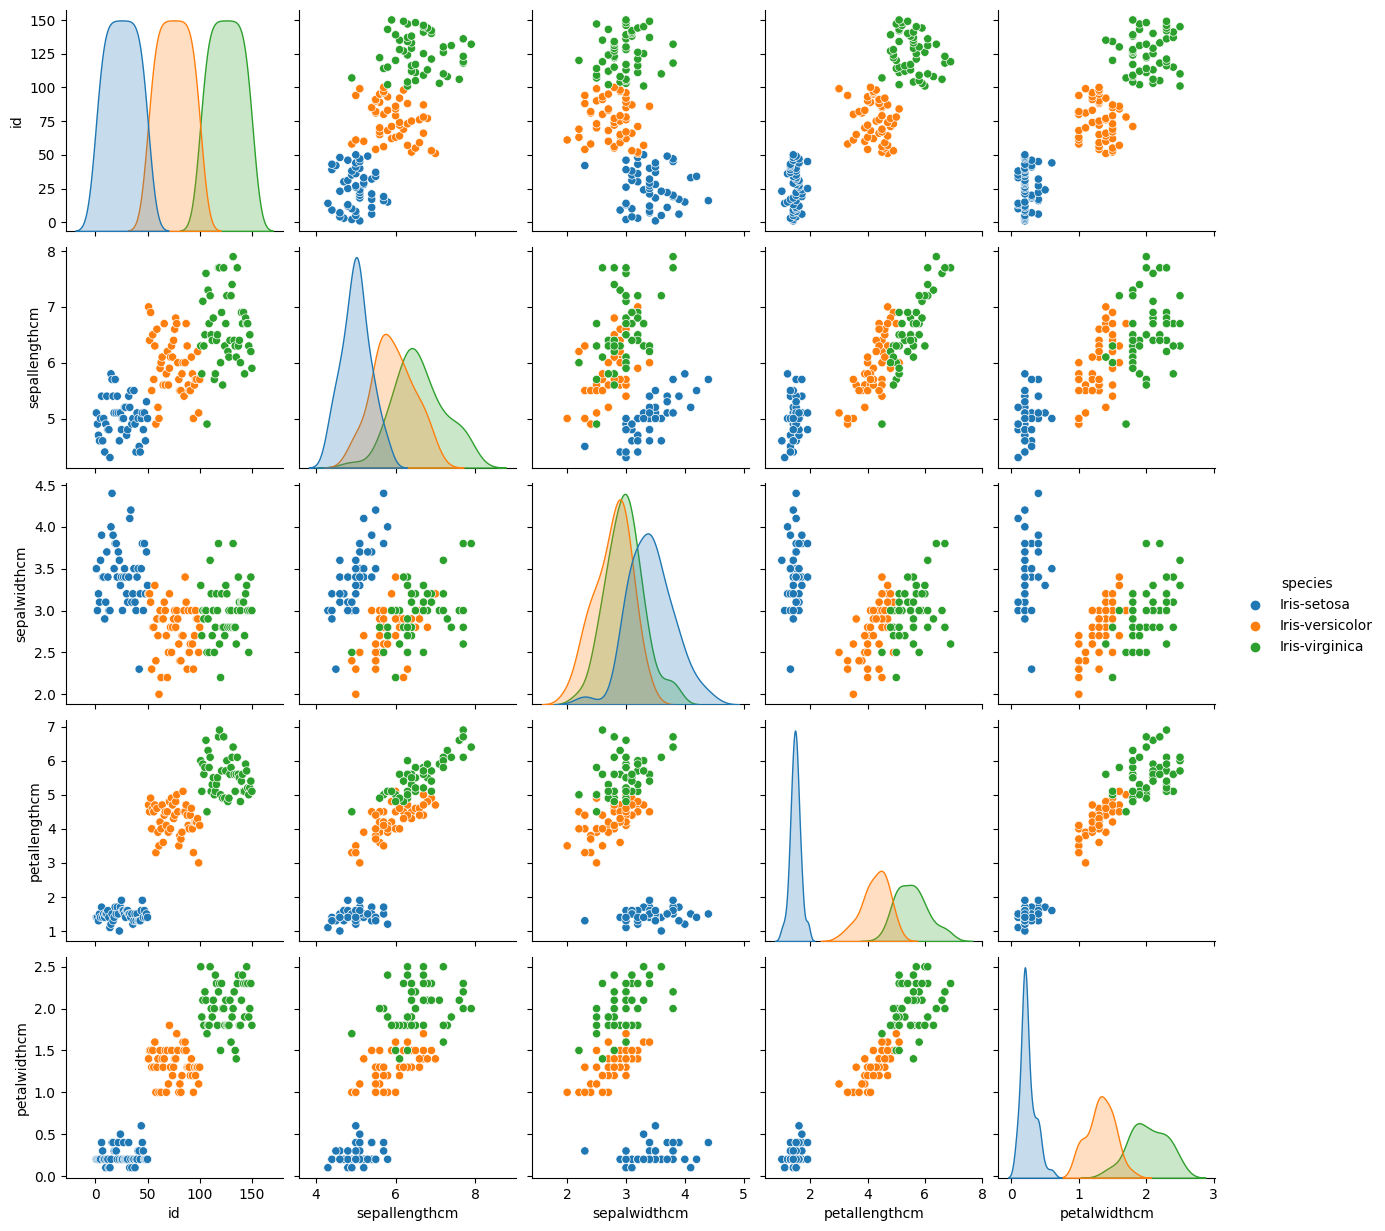

In [77]:
# df = df.iloc[:, :-1]
sns.pairplot(data=df, hue="species")


In [74]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,sepal_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.5
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6
